# Machine Learning Tutorial

A brief journey into data structuring, analysis and machine learning models

Data analysis is the inspection, cleansing and modelling of data with the aim of discovering useful patterns that help make informed decisions.  A common output of a data analysis pipeline is a machine learning model.  Multiple models/algorithms that can create neural networks which eventually form some basis of AI.

This tutorial is simply to understand the process of obtaining real world data, cleaning it and extracting useful information, and then modelling the data based on some interesting question to be answered.

### 1. Make your standard imports

The standard packages for thorough data analysis in Python are pandas, numpy, and seaborn/matplotlib for visualization.  It is often the case that you can be 'lazy' and just use pandas' inbuilt plotting functions, but seaborn and matplotlib are in general a lot more flexible (and colorful).

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2. Get your data

I've chosen a notoriously difficult dataset (81 columns!!) from Kaggle called 'Fuel Economy Database': https://www.kaggle.com/datasets/epa/fuel-economy/code

If you go to the code section, you will notice that not much has been done in the way of modelling (only 14 codes and most not even Python).  I suspect that its because its a large dataset and most of the energy is spent simply cleaning the data and extracting the information you want.  So, I chose this because it represents a real challenge.  Most of the time, you will get data in an uncomfortable format or data which requires some sort of feature engineering.

In comparison, an 'updated' version of this dataset is the auto-mpg dataset, which only has 9 columns and predictably has 219 code examples: https://www.kaggle.com/datasets/uciml/autompg-dataset/code

Download the fuel-economy dataset as a csv and put it in the same directory as where you will run your jupyter notebook

In [193]:
fuel_df = pd.read_csv('./fuel_economy_database.csv')
fuel_df.head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [194]:
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vehicle ID                           38113 non-null  int64  
 1   Year                                 38113 non-null  int64  
 2   Make                                 38113 non-null  object 
 3   Model                                38113 non-null  object 
 4   Class                                38113 non-null  object 
 5   Drive                                36924 non-null  object 
 6   Transmission                         38102 non-null  object 
 7   Transmission Descriptor              15045 non-null  object 
 8   Engine Index                         38113 non-null  int64  
 9   Engine Descriptor                    22693 non-null  object 
 10  Engine Cylinders                     37977 non-null  float64
 11  Engine Displacement         

### 3. Ask Some Research Questions

At this point, most people fall apart here.  They see all this data and become overwhelmed.

Here is where you *roughly* ask yourself the kinds of questions you want to solve or the stories to tell.

There are 81 columns which is too much data for any sensible ML algorithm to deal with.  Remember, you're not here to tell every story in the world. You're here to tell a specific chapter and to tell it very well.  Form some questions which gives you the confidence to extract specific data from the set and drop the rest.

Let's focus on these:

- Can we predict the MPG or CO2 emission of a car?
- Are there noticeable differences in where a car comes from?  Can we predict whether a vehicle comes from USA, Germany or Japan?

So this means we need columns relating to standard engine information, fuel costs, MPG and perhaps GHG.

So keep the columns: 'Make', 'Class', 'Drive', 'Engine Cylinders', 'Engine Displacement', 'Fuel Type', 'Fuel Type 1', 
'Fuel Type 2', 'Combined MPG (FT1)', 'Annual Fuel Cost (FT1)', 'Tailpipe CO2 in Grams/Mile (FT1)', 'Fuel Economy Score', 
'GHG Score'


In [195]:
keep_columns = ['Make', 'Class', 'Drive', 'Engine Cylinders', 'Engine Displacement', 'Fuel Type', 'Fuel Type 1', 
                'Fuel Type 2', 'Combined MPG (FT1)', 'Annual Fuel Cost (FT1)', 'Tailpipe CO2 in Grams/Mile (FT1)',
                'Fuel Economy Score', 'GHG Score']

fuel_1 = fuel_df[keep_columns]
fuel_1.head()

,Make,Class,Drive,Engine Cylinders,Engine Displacement,Fuel Type,Fuel Type 1,Fuel Type 2,Combined MPG (FT1),Annual Fuel Cost (FT1),Tailpipe CO2 in Grams/Mile (FT1),Fuel Economy Score,GHG Score
0,Alfa Romeo,Minicompact Cars,NaN,6.0,2.5,Regular,Regular Gasoline,NaN,20,1750,444.350000,-1,-1
1,Alfa Romeo,Minicompact Cars,NaN,6.0,2.5,Regular,Regular Gasoline,NaN,20,1750,444.350000,-1,-1
2,Alfa Romeo,Two Seaters,NaN,4.0,2.0,Regular,Regular Gasoline,NaN,21,1650,423.190476,-1,-1
3,Alfa Romeo,Two Seaters,NaN,4.0,2.0,Regular,Regular Gasoline,NaN,21,1650,423.190476,-1,-1
4,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,4.0,2.5,Regular,Regular Gasoline,NaN,17,2050,522.764706,-1,-1


### 4. Clean Your Data

Now we need to start cleaning up the data and structuring it to our purposes.  Some notes:

- We probably only need 1 Fuel Type column, we'll pick the one with the most complete information without being too confusing.

- It is likely that Fuel Economy Score and GHG Score together are redundant together and we only need 1.  Multicollinearity can be an issue.  Similar arguments can be made for Engine Cylinders and Displacement, but we will see that they enable us to reliably detect the origin of vehicles.

- If we want USA/Germany/Japan, then lets choose 4 of the top manufacturers each and remove everything else.  Lots of data isn't always good and you can tell from the head that there are likely going to be a lot of unique/very uncommon cars.

- Engine Cylinders happens to be a categorical value.  We should change that column to integers.

- Any car without a drive - remove.  You cannot reliably fill that category with some kind of mean/estimate.

- Any electric vehicle, remove as they will offset the models.  They have no sensible fuel/GHG score or annual fuel cost

- Some rows are bound to be repeats, we may do a pass at the end to remove repeats.  MPG for example is supposed to be continous, but many cars with minor variations in other categories show identical MPG.  

We will spent most of our time here as this important step is going to be the input to our machine learning models.  Be prepared to keep renaming new versions of your dataframe.  

In [196]:
print(fuel_df['Fuel Type'].value_counts())
print("\n")
print(fuel_df['Fuel Type 1'].value_counts())
print("\n")
print(fuel_df['Fuel Type 2'].value_counts())

Regular                        25258
Premium                        10133
Gasoline or E85                 1223
Diesel                          1014
Electricity                      133
Premium or E85                   122
Midgrade                          77
CNG                               60
Premium and Electricity           25
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: Fuel Type, dtype: int64


Regular Gasoline     26531
Premium Gasoline     10298
Diesel                1014
Electricity            133
Midgrade Gasoline       77
Natural Gas             60
Name: Fuel Type 1, dtype: int64


E85            1345
Electricity      65
Natural Gas      20
Propane           8
Name: Fuel Type 2, dtype: int64


<AxesSubplot:>

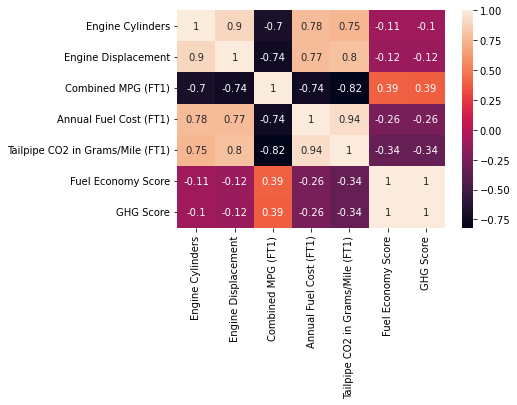

In [197]:
corr_df = fuel_1.corr()
sns.heatmap(corr_df, annot = True)

<AxesSubplot:title={'center':'Engine Cylinders'}, ylabel='Frequency'>

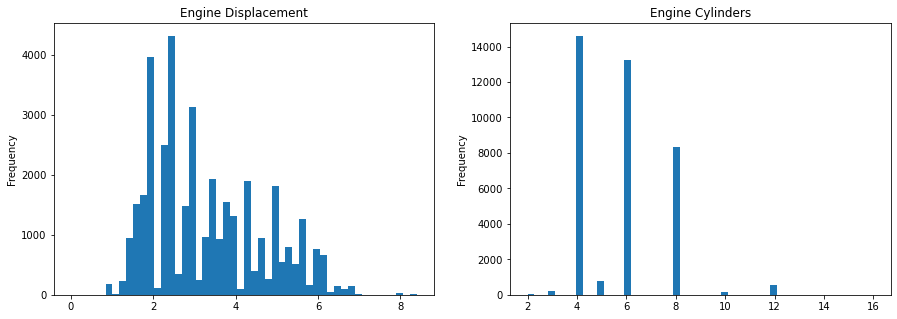

In [198]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
fuel_df['Engine Displacement'].plot(kind = 'hist', title = 'Engine Displacement', bins = 50, ax = axs[0])
fuel_df['Engine Cylinders'].plot(kind = 'hist', title = 'Engine Cylinders', bins = 50, ax = axs[1])

In [199]:
fuel_2 = fuel_1.loc[(fuel_1['Make'] == 'Toyota') | (fuel_1['Make'] == 'Mitsubishi') | (fuel_1['Make'] == 'Nissan') 
                    | (fuel_1['Make'] == 'Honda') 
                    | (fuel_1['Make'] == 'BMW') | (fuel_1['Make'] == 'Audi') | (fuel_1['Make'] == 'Mercedes-Benz')
                    | (fuel_1['Make'] == 'Volkswagon') 
                    | (fuel_1['Make'] == 'Dodge') | (fuel_1['Make'] == 'Ford') | (fuel_1['Make'] == 'Jeep')
                    | (fuel_1['Make'] == 'GMC')]

fuel_2.head()

,Make,Class,Drive,Engine Cylinders,Engine Displacement,Fuel Type,Fuel Type 1,Fuel Type 2,Combined MPG (FT1),Annual Fuel Cost (FT1),Tailpipe CO2 in Grams/Mile (FT1),Fuel Economy Score,GHG Score
34,Audi,Subcompact Cars,NaN,4.0,1.8,Regular,Regular Gasoline,NaN,21,1650,423.190476,-1,-1
35,Audi,Subcompact Cars,NaN,4.0,1.8,Regular,Regular Gasoline,NaN,21,1650,423.190476,-1,-1
36,Audi,Subcompact Cars,NaN,4.0,1.8,Regular,Regular Gasoline,NaN,24,1450,370.291667,-1,-1
37,Audi,Subcompact Cars,NaN,4.0,1.8,Regular,Regular Gasoline,NaN,24,1450,370.291667,-1,-1
38,Audi,Subcompact Cars,NaN,5.0,2.2,Regular,Regular Gasoline,NaN,18,1950,493.722222,-1,-1


In [200]:
fuel_2 = fuel_2.drop(['Fuel Type', 'Fuel Type 2'], axis = 1)
fuel_2.head()

,Make,Class,Drive,Engine Cylinders,Engine Displacement,Fuel Type 1,Combined MPG (FT1),Annual Fuel Cost (FT1),Tailpipe CO2 in Grams/Mile (FT1),Fuel Economy Score,GHG Score
34,Audi,Subcompact Cars,NaN,4.0,1.8,Regular Gasoline,21,1650,423.190476,-1,-1
35,Audi,Subcompact Cars,NaN,4.0,1.8,Regular Gasoline,21,1650,423.190476,-1,-1
36,Audi,Subcompact Cars,NaN,4.0,1.8,Regular Gasoline,24,1450,370.291667,-1,-1
37,Audi,Subcompact Cars,NaN,4.0,1.8,Regular Gasoline,24,1450,370.291667,-1,-1
38,Audi,Subcompact Cars,NaN,5.0,2.2,Regular Gasoline,18,1950,493.722222,-1,-1


In [201]:
fuel_2['Fuel Type 1'].value_counts()

Regular Gasoline     13027
Premium Gasoline      4517
Diesel                 443
Electricity             53
Natural Gas             52
Midgrade Gasoline       48
Name: Fuel Type 1, dtype: int64

In [202]:
fuel_2 = fuel_2.loc[fuel_2['Fuel Type 1'] != 'Electricity']
fuel_2 = fuel_2.drop('Fuel Economy Score', axis = 1)
fuel_2['Fuel Type 1'].value_counts()

Regular Gasoline     13027
Premium Gasoline      4517
Diesel                 443
Natural Gas             52
Midgrade Gasoline       48
Name: Fuel Type 1, dtype: int64

In [203]:
fuel_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18087 entries, 34 to 38061
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              18087 non-null  object 
 1   Class                             18087 non-null  object 
 2   Drive                             17698 non-null  object 
 3   Engine Cylinders                  18087 non-null  float64
 4   Engine Displacement               18087 non-null  float64
 5   Fuel Type 1                       18087 non-null  object 
 6   Combined MPG (FT1)                18087 non-null  int64  
 7   Annual Fuel Cost (FT1)            18087 non-null  int64  
 8   Tailpipe CO2 in Grams/Mile (FT1)  18087 non-null  float64
 9   GHG Score                         18087 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.5+ MB


In [204]:
fuel_2['Engine Cylinders'] = fuel_2['Engine Cylinders'].astype(int)
fuel_2.head()

,Make,Class,Drive,Engine Cylinders,Engine Displacement,Fuel Type 1,Combined MPG (FT1),Annual Fuel Cost (FT1),Tailpipe CO2 in Grams/Mile (FT1),GHG Score
34,Audi,Subcompact Cars,NaN,4,1.8,Regular Gasoline,21,1650,423.190476,-1
35,Audi,Subcompact Cars,NaN,4,1.8,Regular Gasoline,21,1650,423.190476,-1
36,Audi,Subcompact Cars,NaN,4,1.8,Regular Gasoline,24,1450,370.291667,-1
37,Audi,Subcompact Cars,NaN,4,1.8,Regular Gasoline,24,1450,370.291667,-1
38,Audi,Subcompact Cars,NaN,5,2.2,Regular Gasoline,18,1950,493.722222,-1


In [205]:
make_to_country = {
    'Ford': 0,
    'Dodge': 0,
    'Jeep': 0,
    'GMC': 0,
    'Audi': 1,
    'BMW': 1,
    'Mercedes-Benz': 1,
    'Volkswagen': 1
}

def country_label(x):
    return make_to_country.get(x, 2)

fuel_2['Country'] = fuel_2['Make'].apply(country_label)


fuel_2.Country.value_counts()

0    8918
2    5217
1    3952
Name: Country, dtype: int64

Of particular interest is the drive column.  It contains values that are rather confusing.  All-Wheel and 4-Wheel are basically the same thing.  Whilst, 2-Wheel drive doesn't yield enough information to determine whether or not its Rear or Front wheel.  So the former will be combined, whilst the latter (including part time) will be dropped.

In [206]:
fuel_2['Drive'].value_counts()

Rear-Wheel Drive              7092
Front-Wheel Drive             4746
4-Wheel or All-Wheel Drive    3735
All-Wheel Drive                981
4-Wheel Drive                  652
2-Wheel Drive                  340
Part-time 4-Wheel Drive        152
Name: Drive, dtype: int64

In [207]:
def drive(x):
    if x == '4-Wheel or All-Wheel Drive':
        return '4-Wheel Drive'
    elif x == 'All-Wheel Drive':
        return '4-Wheel Drive'
    else:
        return x
    
fuel_2['Drive'] = fuel_2['Drive'].apply(drive)

fuel_3 = fuel_2.loc[(fuel_2['Drive'] != 'Part-time 4-Wheel Drive') & (fuel_2['Drive'] != '2-Wheel Drive')]
fuel_3['Drive'].value_counts()

Rear-Wheel Drive     7092
4-Wheel Drive        5368
Front-Wheel Drive    4746
Name: Drive, dtype: int64

### 5. Exploratory Data Analysis

It's time to explore and visualize the data.  Its easy to get lost in this section, but focusing on the research questions helps to keep EDA to a minimum.  Any other interesting behaviours can be noted.

In [208]:
fuel_3.describe()

,Engine Cylinders,Engine Displacement,Combined MPG (FT1),Annual Fuel Cost (FT1),Tailpipe CO2 in Grams/Mile (FT1),GHG Score,Country
count,17595.000000,17595.000000,17595.000000,17595.000000,17595.000000,17595.000000,17595.000000
mean,5.876897,3.458829,19.432566,2024.077863,488.416018,-0.034101,0.800796
std,1.668833,1.343715,5.235202,507.826767,121.398319,2.347491,0.857759
min,2.000000,0.600000,9.000000,600.000000,29.000000,-1.000000,0.000000
25%,4.000000,2.400000,16.000000,1650.000000,403.954545,-1.000000,0.000000
50%,6.000000,3.000000,19.000000,2000.000000,467.736842,-1.000000,1.000000
75%,8.000000,4.400000,22.000000,2350.000000,555.437500,-1.000000,2.000000
max,12.000000,8.400000,56.000000,4700.000000,987.444444,10.000000,2.000000


<AxesSubplot:xlabel='Country', ylabel='Engine Displacement'>

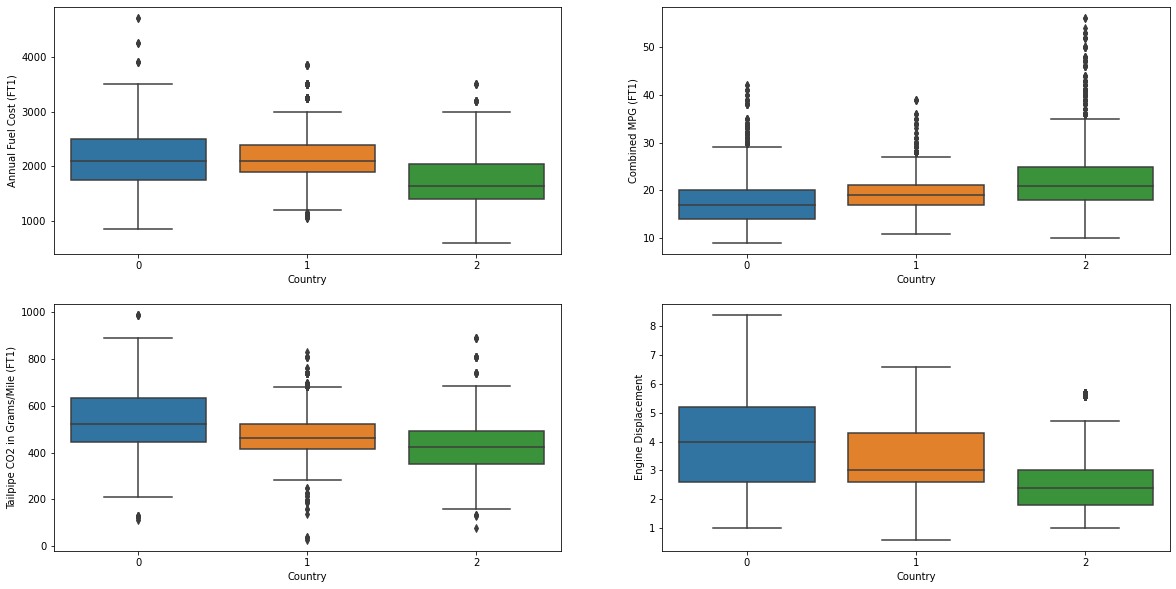

In [209]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))

sns.boxplot(data = fuel_3, x = 'Country', y = 'Annual Fuel Cost (FT1)', ax = axs[0, 0])
sns.boxplot(data = fuel_3, x = 'Country', y = 'Combined MPG (FT1)', ax = axs[0, 1])
sns.boxplot(data = fuel_3, x = 'Country', y = 'Tailpipe CO2 in Grams/Mile (FT1)', ax = axs[1, 0])
sns.boxplot(data = fuel_3, x = 'Country', y = 'Engine Displacement', ax = axs[1, 1])

There are a lot of outliers with respect to MPG.  Too many "erroneous" values can throw off an algorithm.  We are trying to tell a general story here, not a unique one.  So we are better off dropping the data that contains these values before we continue to explore.

In [210]:
no_mpg_outlier = fuel_3['Combined MPG (FT1)'] < (fuel_3['Combined MPG (FT1)'].median() + fuel_3['Combined MPG (FT1)'].std())
no_mpg_outlier.sum()

15011

In [211]:
fuel_clean = fuel_3[no_mpg_outlier]
fuel_clean.describe()

,Engine Cylinders,Engine Displacement,Combined MPG (FT1),Annual Fuel Cost (FT1),Tailpipe CO2 in Grams/Mile (FT1),GHG Score,Country
count,15011.000000,15011.000000,15011.000000,15011.000000,15011.000000,15011.000000,15011.000000
mean,6.187396,3.726234,17.839518,2150.056625,517.991252,-0.355406,0.712811
std,1.604704,1.264088,3.324394,432.427067,104.712220,1.770604,0.824545
min,4.000000,1.500000,9.000000,1350.000000,247.000000,-1.000000,0.000000
25%,5.000000,2.600000,15.000000,1850.000000,444.350000,-1.000000,0.000000
50%,6.000000,3.500000,18.000000,2100.000000,493.722222,-1.000000,0.000000
75%,8.000000,4.800000,20.000000,2350.000000,592.466667,-1.000000,1.000000
max,12.000000,8.400000,24.000000,4700.000000,987.444444,8.000000,2.000000


<AxesSubplot:xlabel='Country', ylabel='Engine Displacement'>

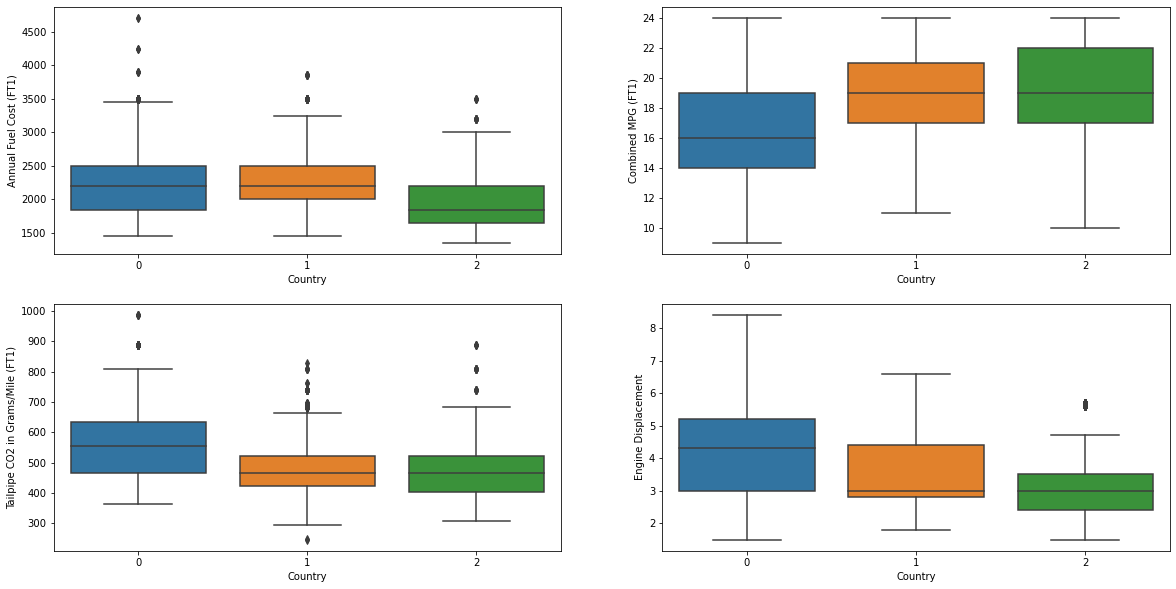

In [212]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))

sns.boxplot(data = fuel_clean, x = 'Country', y = 'Annual Fuel Cost (FT1)', ax = axs[0, 0])
sns.boxplot(data = fuel_clean, x = 'Country', y = 'Combined MPG (FT1)', ax = axs[0, 1])
sns.boxplot(data = fuel_clean, x = 'Country', y = 'Tailpipe CO2 in Grams/Mile (FT1)', ax = axs[1, 0])
sns.boxplot(data = fuel_clean, x = 'Country', y = 'Engine Displacement', ax = axs[1, 1])

<AxesSubplot:xlabel='Drive', ylabel='count'>

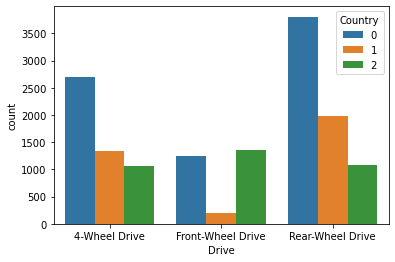

In [213]:
sns.countplot(data = fuel_clean, x = 'Drive', hue = 'Country')

<AxesSubplot:xlabel='Country', ylabel='count'>

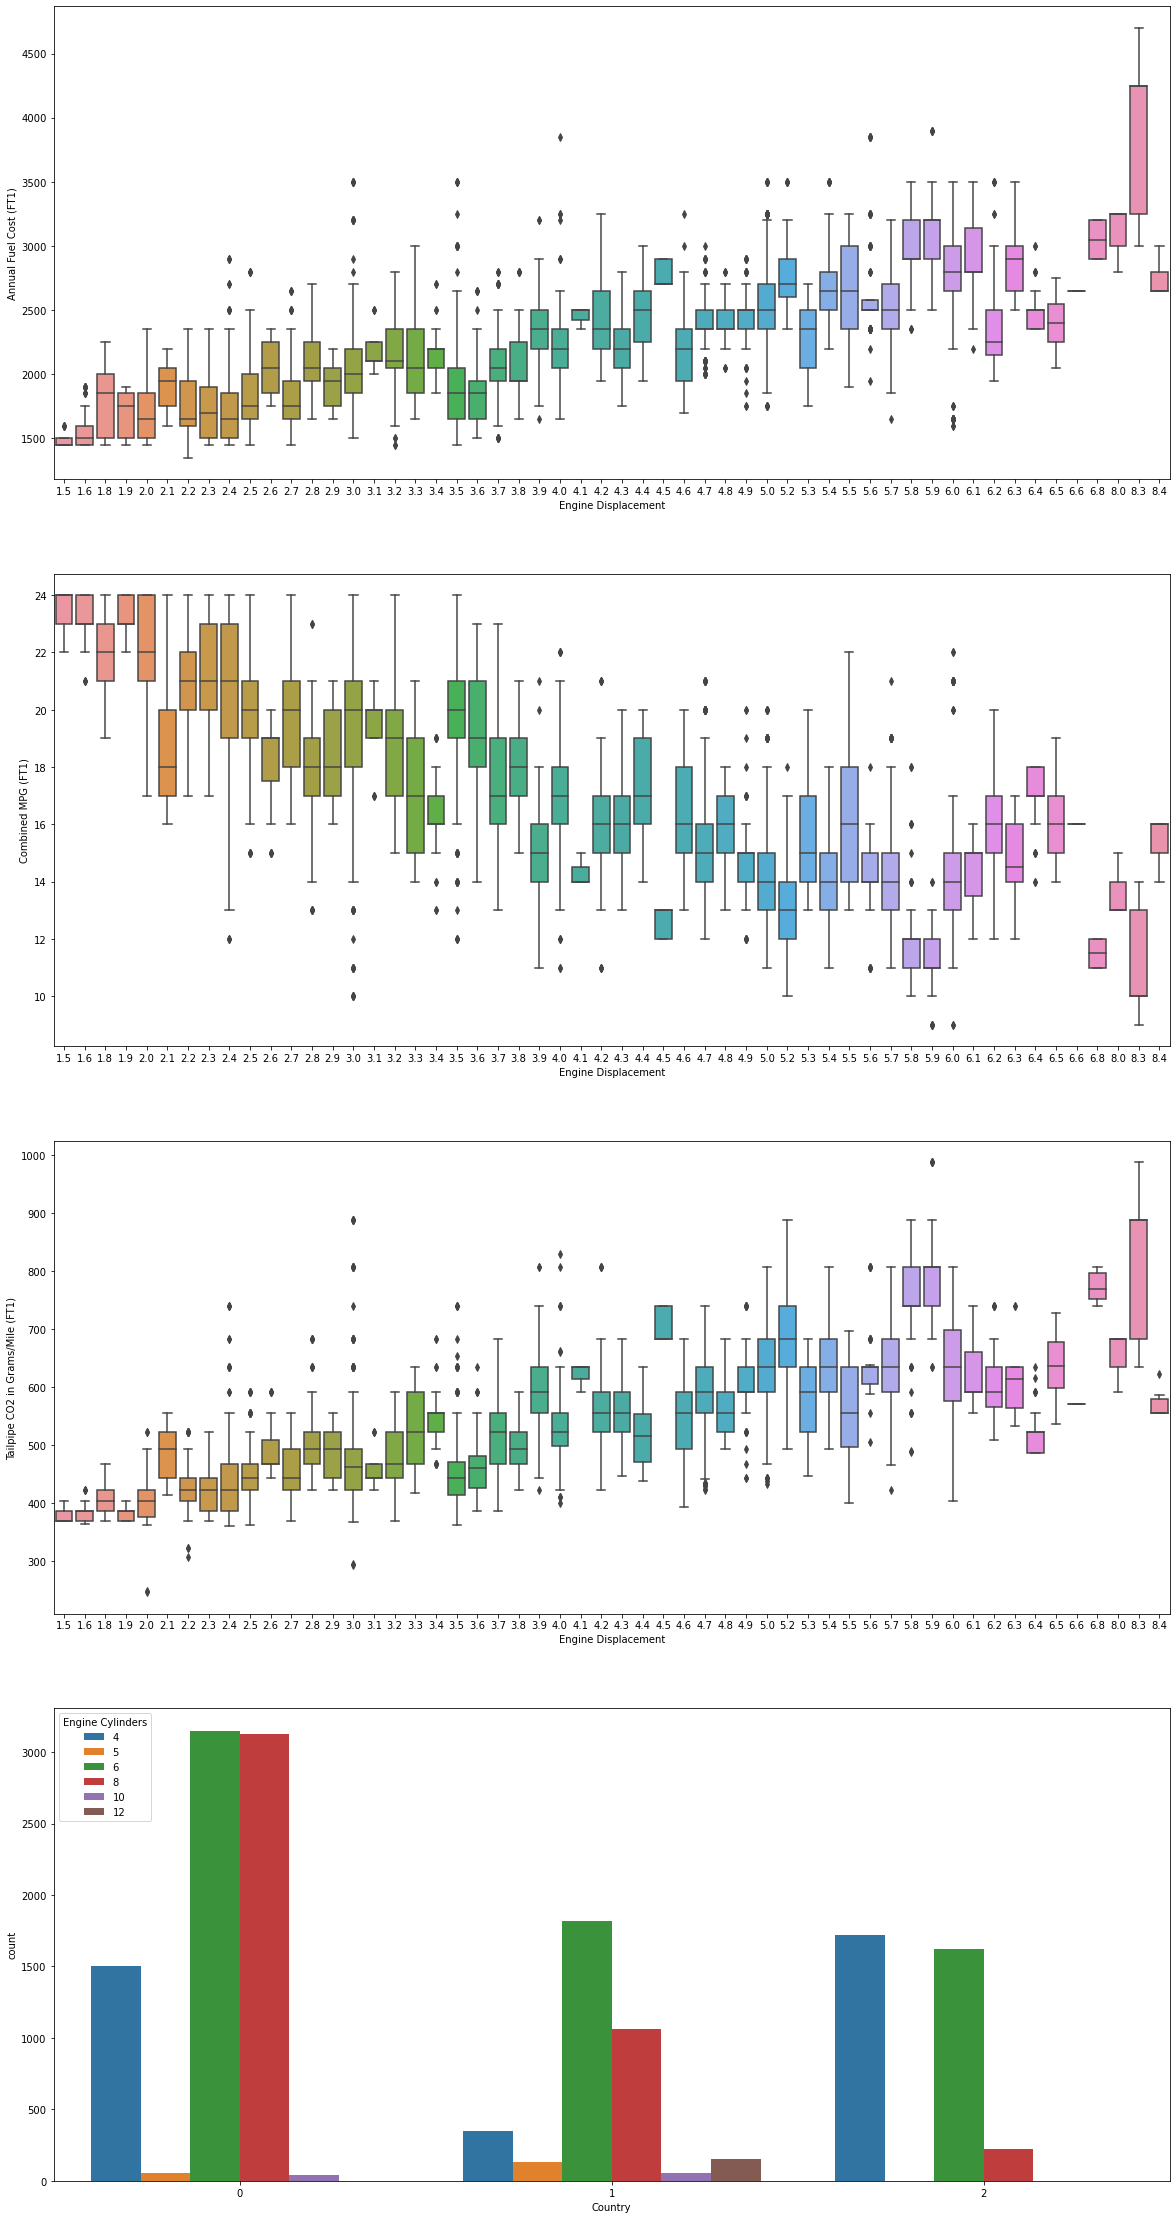

In [214]:
fig, axs = plt.subplots(4, 1, figsize = (20, 40))

sns.boxplot(data = fuel_clean, x = 'Engine Displacement', y = 'Annual Fuel Cost (FT1)', ax = axs[0])
sns.boxplot(data = fuel_clean, x = 'Engine Displacement', y = 'Combined MPG (FT1)', ax = axs[1])
sns.boxplot(data = fuel_clean, x = 'Engine Displacement', y = 'Tailpipe CO2 in Grams/Mile (FT1)', ax = axs[2])
sns.countplot(data = fuel_clean, x = 'Country', hue = 'Engine Cylinders', ax = axs[3])

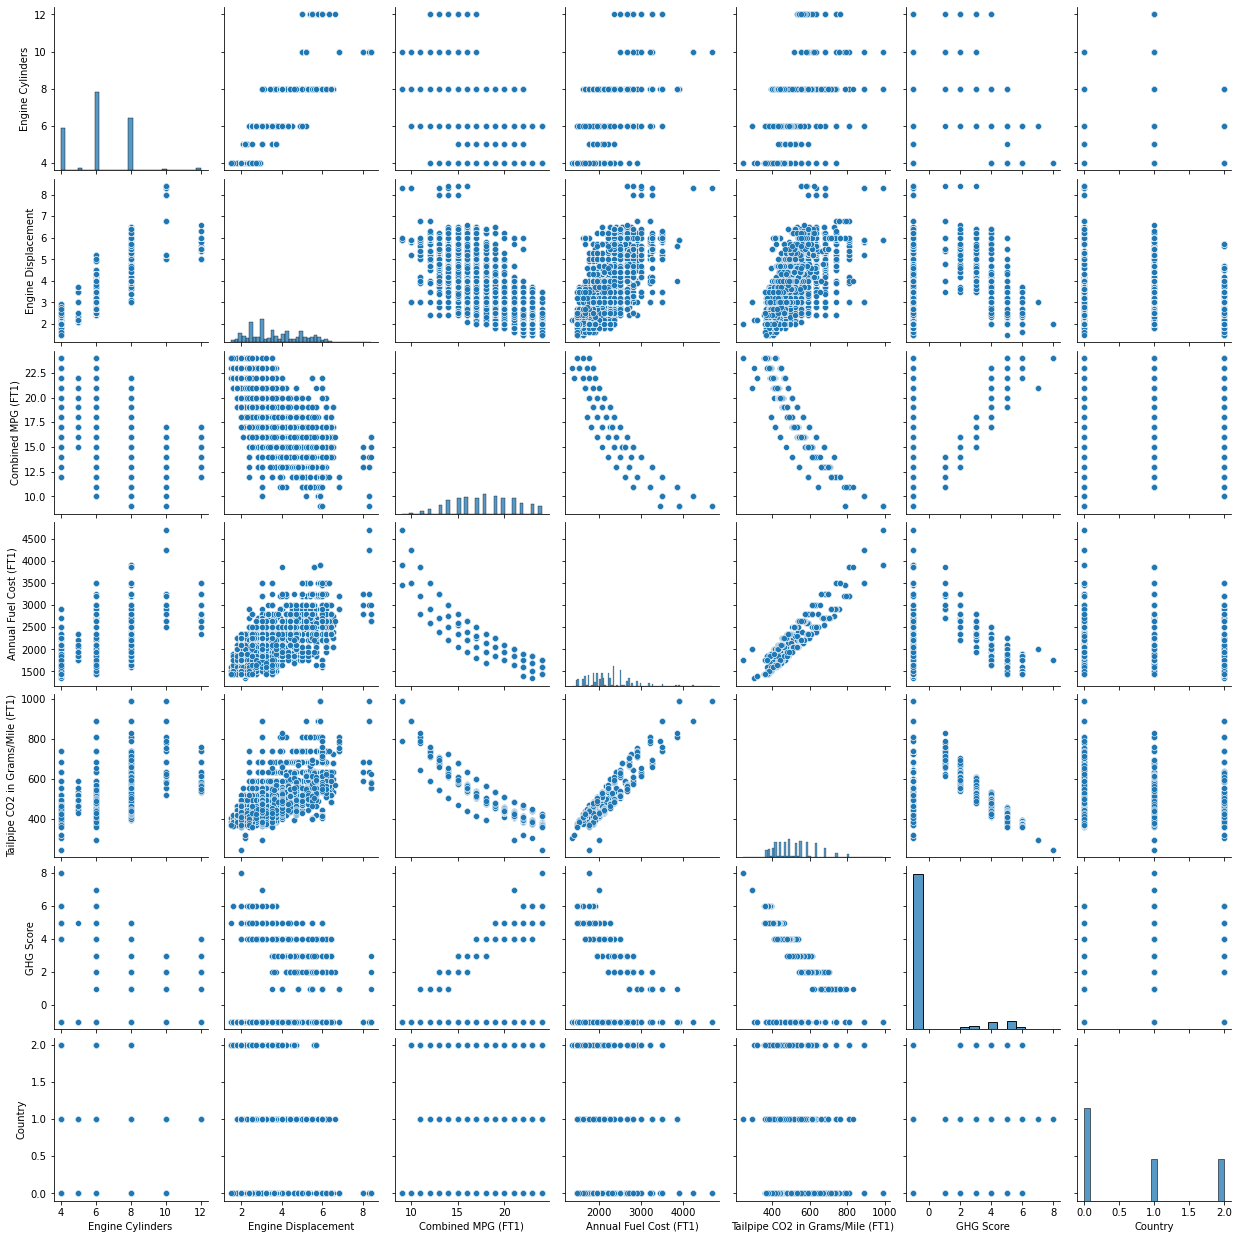

In [215]:
sns.pairplot(data = fuel_clean)

### 6. Transform the Data

By transformation, I mean a combination of scaling and encoding should you still have categories without classifiers.  Scaling data is particularly important for regression, as it makes it easier for a model to understand the data.  This is effectively still a pre-processing step.  In industry, you would bundle all of the cleaning, scaling, transformation and even model fitting steps into a "Pipeline". 

A pipeline is a series of connected steps or stages that are designed to process and transform data, information, or materials in a systematic way and may involve several steps such as data collection, data cleaning, data transformation, feature extraction, and model training. For the automation of potentially complex tasks, constructing a Pipeline is advantageous.  

There is no example in this tutorial however because my cleaning, encoding and scaling steps are both trivial and acting on a unique dataset.  If you expect data to be of the same type and structure, then you'd automate these steps with a pipeline.

I use a standard scaler because most of the data here appears bell curvish.

In [216]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [217]:
cat_feats = fuel_clean[['Make', 'Drive', 'Fuel Type 1' ]]
num_feats = fuel_clean[['Engine Displacement', 'Annual Fuel Cost (FT1)', 'Tailpipe CO2 in Grams/Mile (FT1)']]

In [218]:
def standard_encoding(input_value):
    
    cat_enc = LabelEncoder().fit_transform(input_value)
    
    return cat_enc

In [219]:
def standard_scaling(input_value):
    
    scalar = StandardScaler()
    input_scaled = scalar.fit_transform(input_value)
    
    return input_scaled
    

In [221]:
fuel_clean[['Make', 'Drive', 'Fuel Type 1' ]] = cat_feats.apply(standard_encoding)

ct = ColumnTransformer([
        ('transformation', StandardScaler(), num_feats.columns)
    ], remainder = 'passthrough')

fuel_clean[['Engine Displacement', 'Annual Fuel Cost (FT1)', 'Tailpipe CO2 in Grams/Mile (FT1)']] = ct.fit_transform(num_feats)

fuel_clean.head()

,Make,Class,Drive,Engine Cylinders,Engine Displacement,Fuel Type 1,Combined MPG (FT1),Annual Fuel Cost (FT1),Tailpipe CO2 in Grams/Mile (FT1),GHG Score,Country
34,0,Subcompact Cars,3,4,-1.523864,4,21,-1.156434,-0.905376,-1,1
35,0,Subcompact Cars,3,4,-1.523864,4,21,-1.156434,-0.905376,-1,1
36,0,Subcompact Cars,3,4,-1.523864,4,24,-1.618955,-1.410576,-1,1
37,0,Subcompact Cars,3,4,-1.523864,4,24,-1.618955,-1.410576,-1,1
38,0,Subcompact Cars,3,5,-1.207420,4,18,-0.462652,-0.231777,-1,1


It would have been better to use mapping here or at least create a new column.  Because now, its possible to not be able to tell which catergory is which.  However, our research questions will not be trying to predict Drive, Fuel or Make.  We're only using these categories as features.

Now that we've transformed and encoded everything, we make a final correlation heatmap:

<AxesSubplot:>

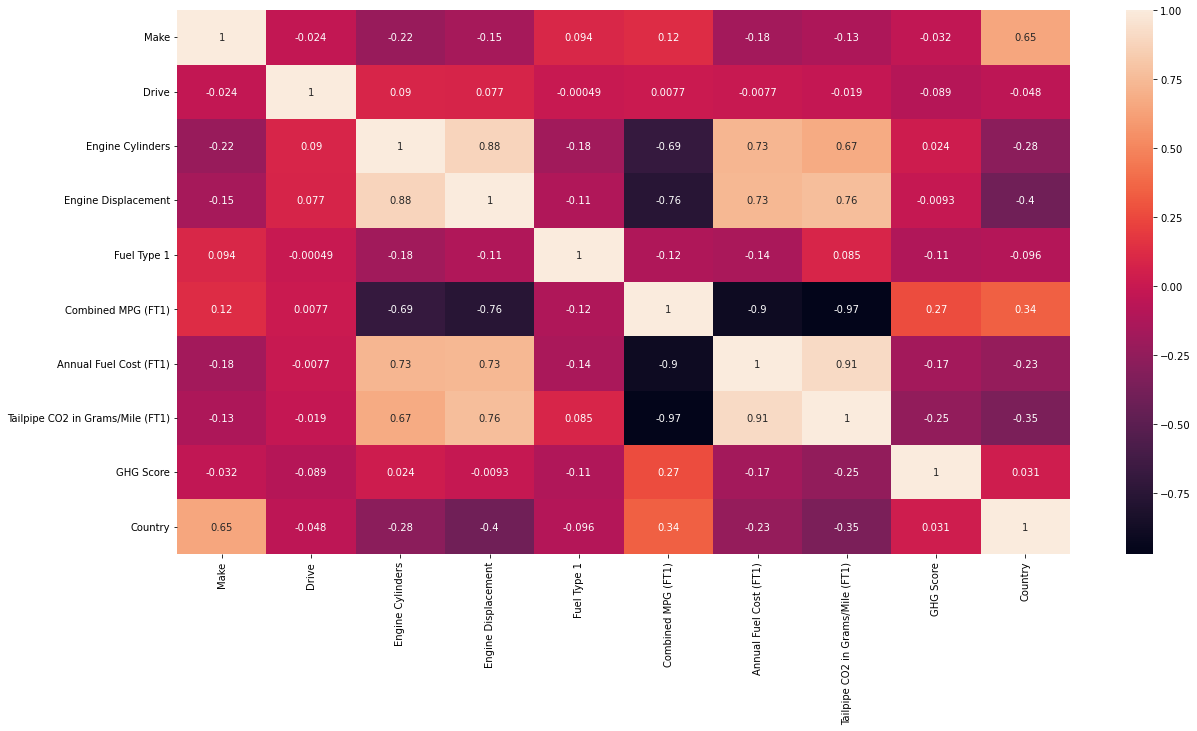

In [222]:
plt.figure(figsize = (20, 10))
corr = fuel_clean.corr()
sns.heatmap(corr, annot = True)

### 7. Modelling

This is the easiest part, but also the easiest to get wrong.  Its a half-joke that when someone learns linear regression for the first time, that is all they will use even if it is clearly the wrong technique for the data.  So to continue the joke, we will use linear regression to try and predict MPG based off of chosen features.

Now warning: you are never meant to model based off of all the features in your data.  Generally you'd choose the strongest postive and negative correlations, this avoids noise and cuts down on computational time.  With the exception of Class who data I didn't bother to encode (there was not enough domain knowledge to structure the types of cars), I'm going to train using all features anyway.

In [223]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

X = fuel_clean.drop(['Class', 'Combined MPG (FT1)'], axis = 1)
y = fuel_clean['Combined MPG (FT1)']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [225]:
X_train.shape

(12008, 9)

In [226]:
X_test.shape

(3003, 9)

In [227]:
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)

LinearRegression()

In [228]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score

pred = linmodel.predict(X_train)
mse = mean_squared_error(y_train, pred)
rmse = np.sqrt(mse)
rmse

0.7233326901867778

In [229]:
fuel_clean.describe()['Combined MPG (FT1)']['mean']

17.839517687029513

In [230]:
scores = cross_val_score(linmodel, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

scores = -scores

scores.mean()

# Cross-validation didn't show much improvement

0.723654986088789

In [231]:
pred_test = linmodel.predict(X_test)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
rmse

0.7092455840941134

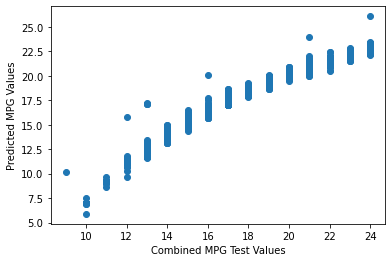

In [232]:
plt.scatter(y_test, pred_test)
plt.xlabel("Combined MPG Test Values")
plt.ylabel("Predicted MPG Values")
plt.show()

That was pretty good!  Now I mentioned the Linear Regression is not the best model to use, especially if there seems to be some non-linear relationship and larger numbers of features.  With Linear Regression, I only really want 3 - 4 features, here we used about 9.  Further more from the pairplot, we can see that the strength of linearity with MPG isn't very strong.  So, I think we should used Support Vector Regression which has its strengths with this sort of data.

SVR works by forming decision boundaries (hyperplanes) where data falling either side of the boundaries are attributed to different classes.  The points closest to or on the boundaries are called support vectors. 

In [233]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

poly_svr = SVR(kernel = 'poly')
poly_svr.fit(X_train, y_train)

SVR(kernel='poly')

In [234]:
prediction_poly = poly_svr.predict(X_test)

In [235]:
mse_poly = mean_squared_error(y_test, prediction_poly)
rmse_poly = np.sqrt(mse_poly)
rmse_poly

0.5229979598853686

In [236]:
poly_svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [237]:
params = {'gamma': [0.0001, 0.001, 0.01, 0.1], 'C': [1, 100, 1000], 'epsilon': [0.1, 0.3, 0.5], 'degree': [1, 3, 5]}

rnd_search = RandomizedSearchCV(SVR(), params, n_iter = 10, verbose = 2, cv = 3, random_state = 42)

rnd_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .........C=1000, degree=1, epsilon=0.3, gamma=0.001; total time=   1.5s
[CV] END .........C=1000, degree=1, epsilon=0.3, gamma=0.001; total time=   1.4s
[CV] END .........C=1000, degree=1, epsilon=0.3, gamma=0.001; total time=   1.5s
[CV] END .............C=1, degree=1, epsilon=0.5, gamma=0.01; total time=   0.5s
[CV] END .............C=1, degree=1, epsilon=0.5, gamma=0.01; total time=   0.5s
[CV] END .............C=1, degree=1, epsilon=0.5, gamma=0.01; total time=   0.5s
[CV] END ...........C=1, degree=1, epsilon=0.3, gamma=0.0001; total time=   4.5s
[CV] END ...........C=1, degree=1, epsilon=0.3, gamma=0.0001; total time=   4.4s
[CV] END ...........C=1, degree=1, epsilon=0.3, gamma=0.0001; total time=   4.5s
[CV] END ...........C=1000, degree=1, epsilon=0.5, gamma=0.1; total time=   0.2s
[CV] END ...........C=1000, degree=1, epsilon=0.5, gamma=0.1; total time=   0.2s
[CV] END ...........C=1000, degree=1, epsilon=0.

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [1, 100, 1000],
                                        'degree': [1, 3, 5],
                                        'epsilon': [0.1, 0.3, 0.5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1]},
                   random_state=42, verbose=2)

In [238]:
rnd_search.best_params_

{'gamma': 0.1, 'epsilon': 0.3, 'degree': 5, 'C': 100}

In [239]:
rnd_search.best_estimator_

SVR(C=100, degree=5, epsilon=0.3, gamma=0.1)

In [240]:
poly_best = rnd_search.best_estimator_

In [241]:
best_pred_poly = poly_best.predict(X_train)
mse_poly = mean_squared_error(y_train, best_pred_poly)
rmse_poly = np.sqrt(mse_poly)
rmse_poly

0.17470520673087683

In [242]:
best_pred_test = poly_best.predict(X_test)
mse_poly = mean_squared_error(y_test, best_pred_test)
rmse_poly = np.sqrt(mse_poly)
rmse_poly

0.2074184388363012

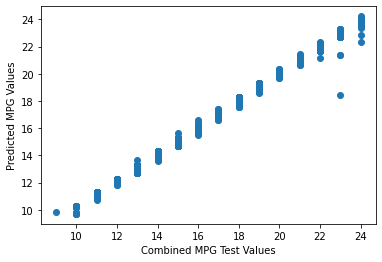

In [243]:
plt.scatter(y_test, best_pred_test)
plt.xlabel("Combined MPG Test Values")
plt.ylabel("Predicted MPG Values")
plt.show()

Well this is really, really good!  If we were to get some new data with the same features, we could comfortably predict the MPG (and therefore fuel efficiency) of a car based on attributes like CO2, Fuel Cost and Engine Displacement.

Now its time to try and predict where a car comes from, using the features.  Will it come from USA, Germany or Japan?  The first thing that comes to mind is a decision tree.  Similar to SVM, it creates boundaries (which are probabilistic) to separate the data.  These are basically decision nodes.  However, let's scale the MPG and then look at a pairplot first.

In [244]:
fuel_country = fuel_clean.copy()
fuel_country['Combined MPG (FT1)'] = standard_scaling(fuel_country[['Combined MPG (FT1)']])
fuel_country.head()

,Make,Class,Drive,Engine Cylinders,Engine Displacement,Fuel Type 1,Combined MPG (FT1),Annual Fuel Cost (FT1),Tailpipe CO2 in Grams/Mile (FT1),GHG Score,Country
34,0,Subcompact Cars,3,4,-1.523864,4,0.950726,-1.156434,-0.905376,-1,1
35,0,Subcompact Cars,3,4,-1.523864,4,0.950726,-1.156434,-0.905376,-1,1
36,0,Subcompact Cars,3,4,-1.523864,4,1.853176,-1.618955,-1.410576,-1,1
37,0,Subcompact Cars,3,4,-1.523864,4,1.853176,-1.618955,-1.410576,-1,1
38,0,Subcompact Cars,3,5,-1.207420,4,0.048276,-0.462652,-0.231777,-1,1


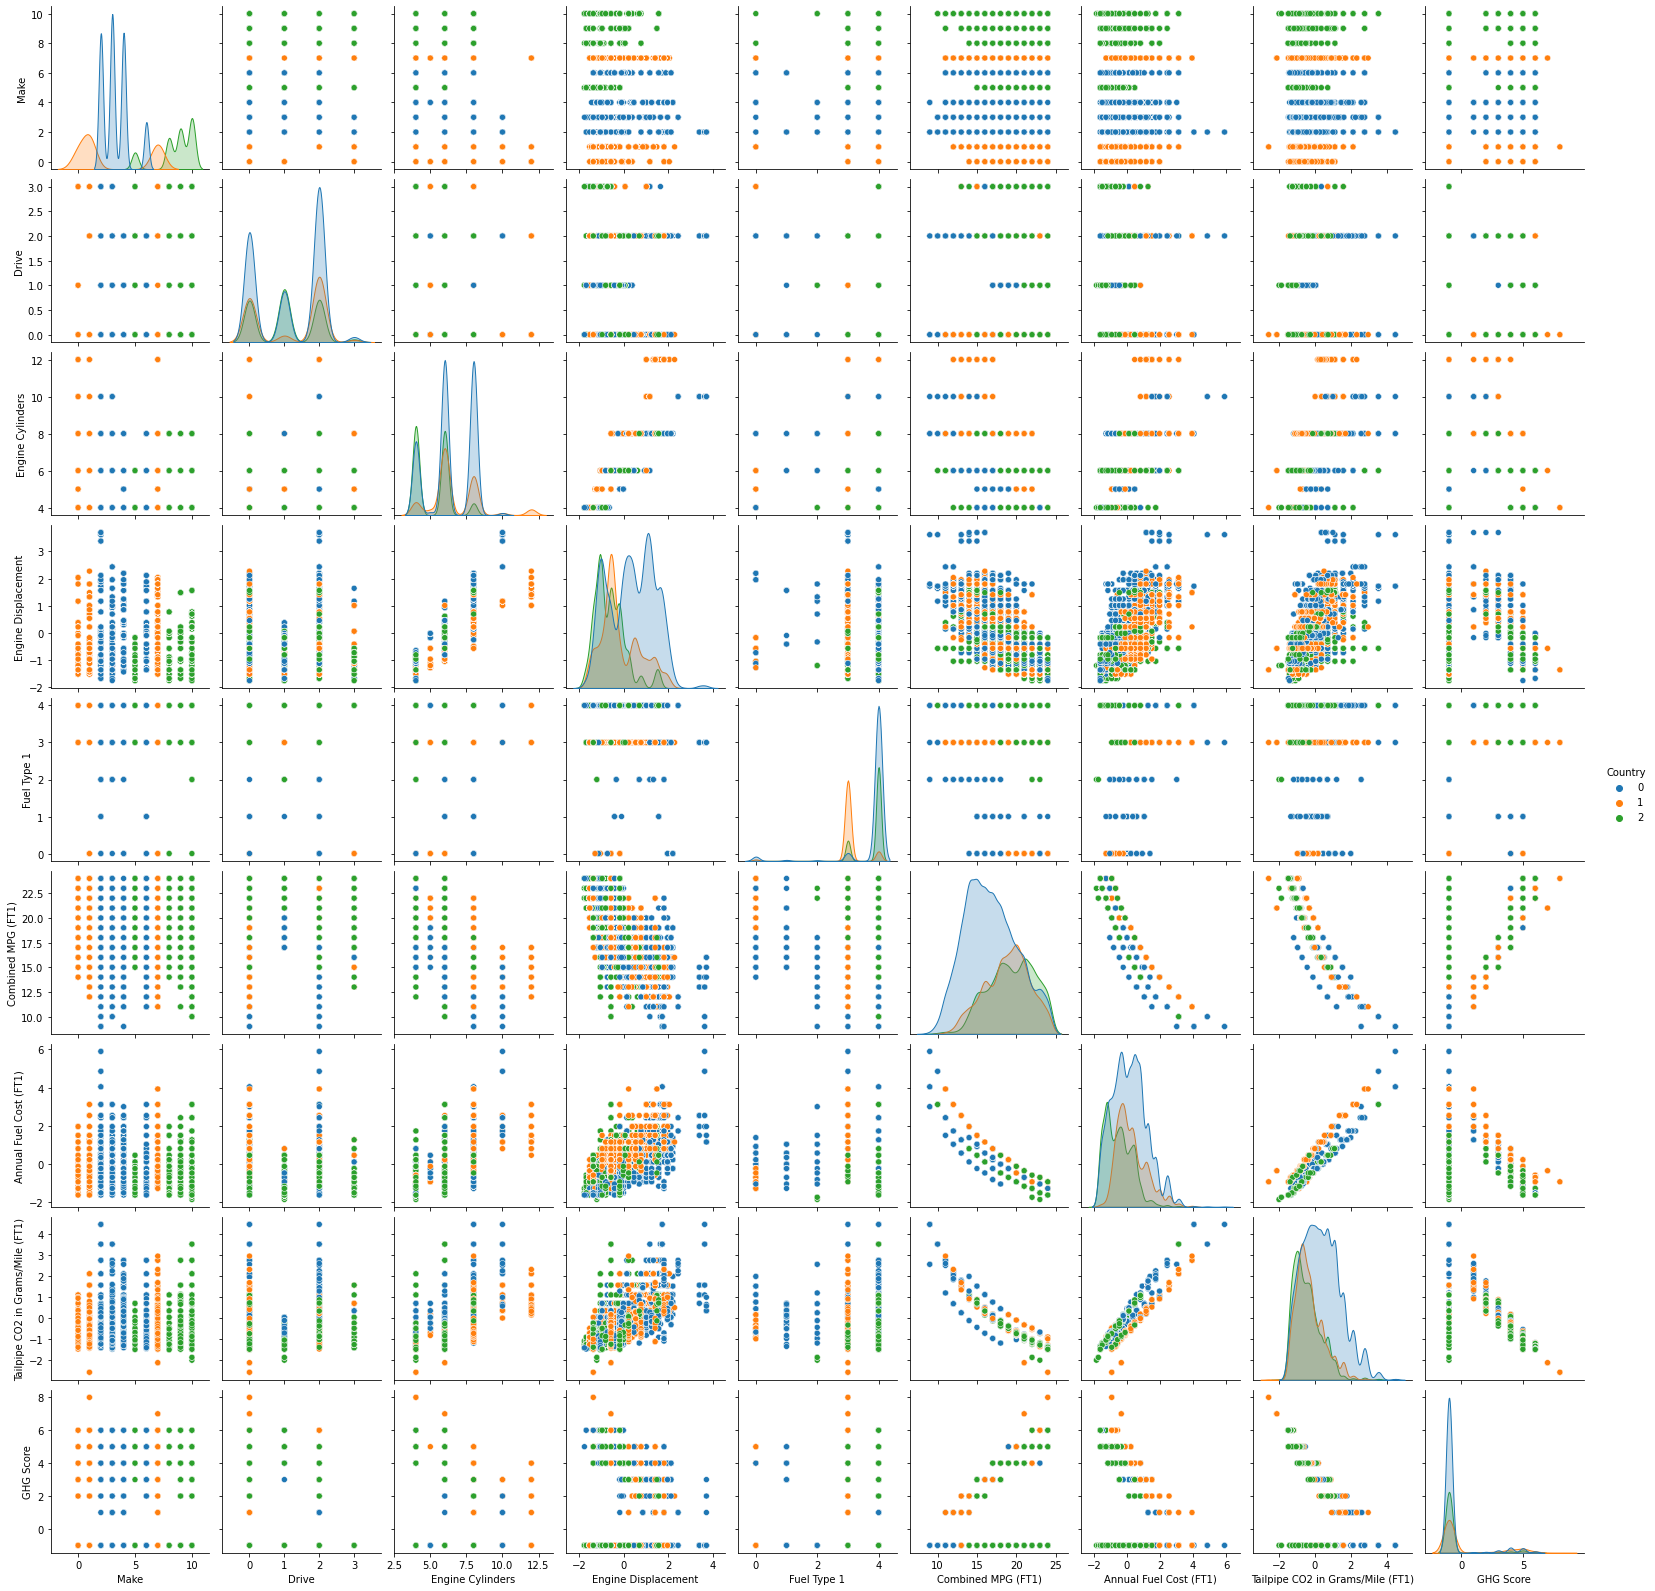

In [245]:
sns.pairplot(data = fuel_clean, hue = 'Country', palette = 'tab10')

Looking at the diagonal distributions, we can see that only Engine Displacement has distinction.  The rest all overlap and would make it different for a machine to learn the data.  So rather than using just a Decision Tree, we should probably use an ensemble to help us, as this could be difficult.

An ensemble is essentially a technique of combining individual machine learning models to improve predictive performance.  We'll do this twice: a voting classifier ensemble which basically aggregates multiple models.  And a Stacking Classifer which uses the output of a lower level model as the input to another model the next level up - stacking the predictive power essentially by retraining itself.


In [246]:
X = fuel_clean.drop(['Make', 'Class', 'Country'], axis = 1)
y = fuel_clean['Country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [248]:
log_class = LogisticRegression()
sv_class = SVC()
tree_class = DecisionTreeClassifier()

def classifiers(clf1, clf2, clf3, trainx, trainy):
    
    clfs = [clf1, clf2, clf3]
    all_clfs_acc = []
    
    for clf in clfs:
        clf.fit(trainx, trainy)
        preds = clf.predict(trainx)
        acc = accuracy_score(trainy, preds)
        acc = acc.tolist()
        all_clfs_acc.append(acc)
        
    return all_clfs_acc

In [249]:
classifiers(log_class, sv_class, tree_class, X_train, y_train)

[0.7231845436375749, 0.7299300466355763, 0.9118087941372418]

In [251]:
from sklearn.ensemble import VotingClassifier

vot_classifier = VotingClassifier(estimators = [('log_reg', log_class),
                                               ('svc', sv_class),
                                               ('tree', tree_class)], voting = 'hard')

vot_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression()), ('svc', SVC()),
                             ('tree', DecisionTreeClassifier())])

In [252]:
pred_ens = vot_classifier.predict(X_train)
acc = accuracy_score(y_train, pred_ens)
acc

0.7807295136575616

In [253]:
pred_test = vot_classifier.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)
acc_test

0.7728937728937729

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1866
           1       0.91      0.83      0.87       789
           2       0.33      0.70      0.45       348

    accuracy                           0.77      3003
   macro avg       0.72      0.76      0.72      3003
weighted avg       0.85      0.77      0.80      3003



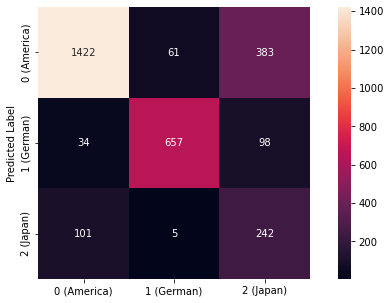

In [254]:
print(classification_report(pred_test, y_test))

plt.figure(figsize = (10, 5))
cm = confusion_matrix(pred_test, y_test)

sns.heatmap(cm, square = True, annot = True, fmt = 'd', cbar = True,
           xticklabels = ['0 (America)', '1 (German)', '2 (Japan)'],
           yticklabels = ['0 (America)', '1 (German)', '2 (Japan)'])

plt.ylabel('Actual Label')
plt.ylabel('Predicted Label');

The ensemble cannot predict Japanese cars well.  So let's trying the stacking classifier.

In [255]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

base_estimators = [
    ('rand', RandomForestClassifier(random_state = 42)),
    ('svc', SVC(random_state = 42))]

final_estimator = LogisticRegression()

stack_clf = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

stack_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rand',
                                RandomForestClassifier(random_state=42)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=LogisticRegression())

In [256]:
pred = stack_clf.predict(X_train)
acc = accuracy_score(y_train, pred)
acc

0.9116422385076616

In [257]:
pred = stack_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.8951048951048951

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1613
           1       0.96      0.95      0.95       727
           2       0.76      0.82      0.79       663

    accuracy                           0.90      3003
   macro avg       0.88      0.89      0.89      3003
weighted avg       0.90      0.90      0.90      3003



<AxesSubplot:xlabel='Country', ylabel='Engine Displacement'>

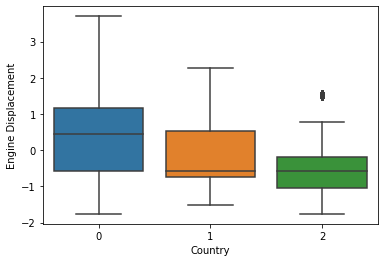

In [258]:
print(classification_report(pred, y_test))
sns.boxplot(data = fuel_clean, x = 'Country', y = 'Engine Displacement')

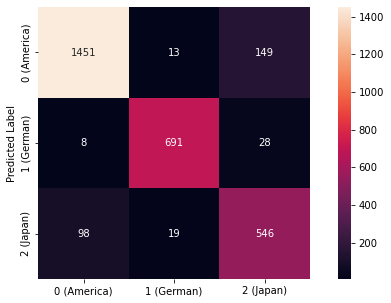

In [259]:
plt.figure(figsize = (10, 5))
cm = confusion_matrix(pred, y_test)

sns.heatmap(cm, square = True, annot = True, fmt = 'd', cbar = True,
           xticklabels = ['0 (America)', '1 (German)', '2 (Japan)'],
           yticklabels = ['0 (America)', '1 (German)', '2 (Japan)'])

plt.ylabel('Actual Label')
plt.ylabel('Predicted Label');